## Topik
Silakan memilih topik final project antara Regression, Classification atau Clustering. Kalian juga boleh memilih topik mengenai Anomaly Detection, Novelty Detection hingga Dimensionality Reduction. Beberapa contoh kasus dari masing-masing topik adalah sebagai berikut:

1. Regression: House Pricing, NYC Taxi Fare Prediction, Wallmart Sales in Stormy Weather, dll
2. Classification: SF Crime Classification, Wallmart Trip Type, Titanic, dll
3. Clustering: Human Activity Recognition, Credit Card Clustering, Household Electric Consumption, dll

## Data Sources
Kalian bisa memilih data dari salah satu repository dibawah ini. Pilih data yang menurut kalian paling nyaman digunakan karena tidak ada batasan untuk memilih data dalam mengerjakan final project.

### Popular open data repositories
- UC Irvine Machine Learning Repository
- Kaggle datasets
- Amazon’s AWS datasets

### Meta portals (they list open data repositories)
- Data Portals
- OpenDataMonitor
- Quandl

### Other pages listing many popular open data repositories
- Wikipedia’s list of Machine Learning datasets
- Quora.com
- The datasets subreddit

## Panduan Pengerjaan & Penilaian
Final Project dikerjakan dalam format notebook dengan/atau dengan model deployment (Opsional) dengan beberapa kriteria wajib di bawah ini:

1. Machine learning framework yang digunakan adalah Scikit-Learn
2. Ada penggunaan library visualisasi, seperti matplotlib atau seaborn
3. Project dinyatakan selesai dan diterima untuk dinilai jika saat dilakukan Run All pada notebook, semua cell berhasil tereksekusi sampai akhir.
4. Isi notebook harus mengikuti outline di bawah ini:
    - Pengenalan
        Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

    - Import pustaka yang dibutuhkan
        Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

    - Data Loading & Exploratory Data Analysis
        Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan exploratory data analysis (EDA). Proses EDA harus melibatkan penggunaan library visualisasi. Sebagai contoh, proses EDA bisa saja melakukan visualisasi distribusi kelas pada data, distribusi ukuran gambar (untuk topik CV), atau distribusi panjang kalimat (untuk topik NLP), dan eksplorasi data lain yang dibutuhkan.

    - Data Preprocessing
        Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

    - Pendefinisian Model
        Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

    - Pelatihan Model
        Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

    - Evaluasi Model
        Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Jika memilih untuk melakukan model deployment, lanjut ke poin dibawah. Jika tidak, lanjut ke poin 5 dan 6.

    - Model Saving
        Dengan melihat hasil evaluasi model, pilih model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

    - Model Inference
        Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

    - Kesimpulan
    
5. Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.
6. Notebook harus diupload dalam akun GitHub masing-masing.
7. Lakukan model deployment ke Heroku.
8. Penilaian project dilakukan berdasarkan notebook dan service/API model yang sudah di-deploy (Jika melakukan model deployment).

# Topik yang saya pilih adalah Classification dengan dataset Titanic

## Overview
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


   ## Data Dictionary

| Variable | Definition | Key |
| :--- | :--- | :--- |
| survival |Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic| |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Data Preparation

Load the library you need.

In [83]:
# Get your import statement here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import pingouin as pg
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_curve
import pickle

In [38]:
# Load your dataset here

test_data = pd.read_csv('dataset/test.csv')
titanic = pd.read_csv('dataset/train.csv')
g_sub = pd.read_csv('dataset/gender_submission.csv')

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
g_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## EDA

ada nan di age, cabin, dan embarked

In [41]:
titanic.isna().sum()/len(titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

nan pada cabin terlalu banyak (di atas 50%), kolom cabin akan didrop. jika misal NaN diimpute dengan 'unknown' takutnya model akan menjadi bias

In [42]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    nan = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        nan.append(df[i].isnull().sum())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques, 'nan': nan})

In [43]:
report(titanic)

,Column,d_type,unique_sample,n_uniques,nan
0,PassengerId,int64,"[1, 2, 3, 4, 5]",891,0
1,Survived,int64,"[0, 1]",2,0
2,Pclass,int64,"[3, 1, 2]",3,0
3,Name,object,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891,0
4,Sex,object,"[male, female]",2,0
5,Age,float64,"[22.0, 38.0, 26.0, 35.0, nan]",88,177
6,SibSp,int64,"[1, 0, 3, 4, 2]",7,0
7,Parch,int64,"[0, 1, 2, 5, 3]",7,0
8,Ticket,object,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681,0
9,Fare,float64,"[7.25, 71.2833, 7.925, 53.1, 8.05]",248,0


passangerid, name dan ticket akan di drop karena terrlalu banyak unique dan tidak penting

In [44]:
titanic.columns = titanic.columns.str.lower()
titanic.drop('name cabin passengerid ticket'.split(), axis=1, inplace=True)

In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


> ## Age

untuk mengisi age, lihat dulu distribusinya:
 - normal > diisi Mean
 - skew > diisi Median

In [46]:
titanic.loc[:,'age'].mean()

29.69911764705882

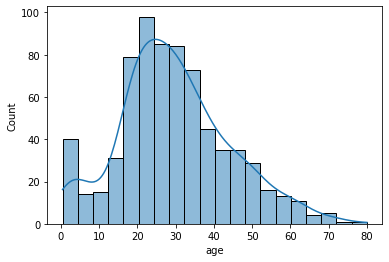

In [47]:
sns.histplot(titanic.age, kde=True)
plt.show()

<AxesSubplot:xlabel='age'>

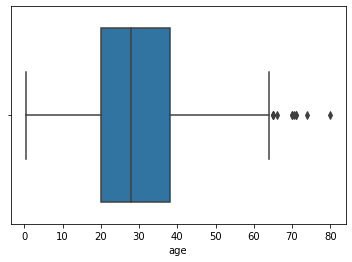

In [15]:
sns.boxplot(x='age', data=titanic)

Terlihat agak skew, tapi kita bisa buktikan dengan qqplot


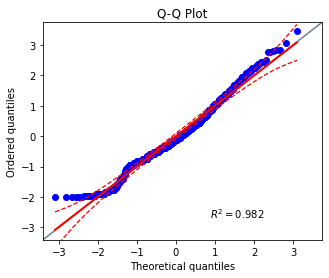

In [48]:
pg.qqplot(titanic.age, dist='norm')
plt.show()

distribusi terlihat relatif, diimpute dengan mean

> ## Embarked

In [49]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [50]:
titanic[titanic.embarked.isna() == True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


yang nan cuma ada 2, 2-2 nya sama-sama female dan pclass 1

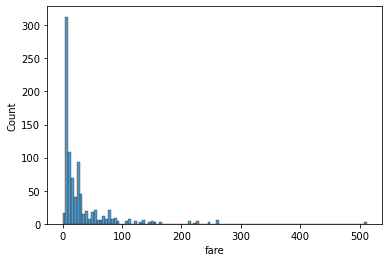

In [51]:
sns.histplot(titanic.fare)
plt.show()

In [53]:
#mencari rata2 harga berdasarkan kelas dan tempat keberangkatan

pd.crosstab(index = titanic.embarked, columns = titanic.pclass, values = titanic.fare, aggfunc = np.median)

# karena diliat dr grafik di atas, farenya skew, maka kita pakai median

pclass,1,2,3
embarked,,,
C,78.2667,24.00,7.8958
Q,90.0000,12.35,7.7500
S,52.0000,13.50,8.0500


In [54]:
#mencari jumlah perempuan berdasarkan keberangkatan

pd.crosstab(index = titanic.embarked, columns = titanic.sex)

sex,female,male
embarked,,
C,73,95
Q,36,41
S,203,441


dari semua yg female yg dititanic, kebanyaan berangkat dari S

> Age impute dengan median
Embarked impute dengan S

In [55]:
titanic['age'] = titanic.age.replace(np.nan, titanic.age.mean())
titanic['embarked'] = titanic.embarked.replace(np.nan, 'S')

> # Survived

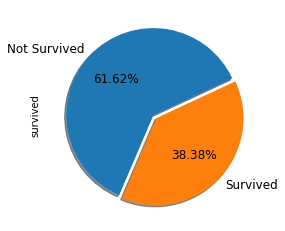

In [56]:
labels ="Not Survived", "Survived"

titanic.survived.value_counts(normalize = True).plot.pie(explode=[0,0.05], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)
plt.show()

> ### Survived & Fare

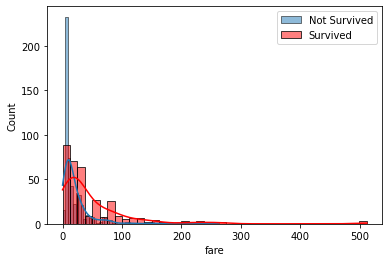

In [57]:
sns.histplot(titanic[titanic['survived'] == 0]['fare'], label = 'Not Survived', kde=True)
sns.histplot(titanic[titanic['survived'] == 1]['fare'], label = 'Survived', color='r', kde=True)
plt.legend()
plt.plot()
plt.show()

penumpang yang membayar lebih mahal mempunyai peluang untuk selamat yang lebih tinggi dari pada yang membayar agak murah

> ### Survived & Sex

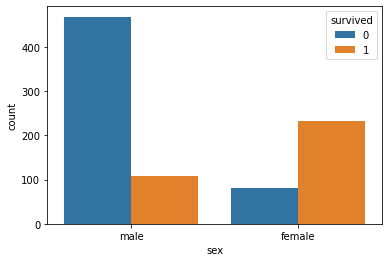

In [58]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.show()

lebih banyak female yang selamat dari pada male

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


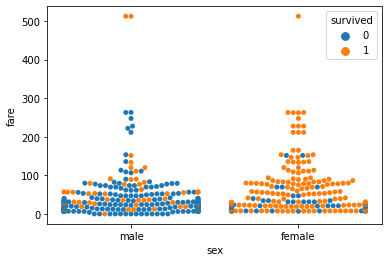

In [59]:
sns.swarmplot(y='fare', x='sex', hue='survived', data=titanic)
plt.show()

female dari berbagai macam pembayaran lebih cenderung untuk selamat dibanding male

> ### Survived & Siblings

<AxesSubplot:xlabel='sibsp'>

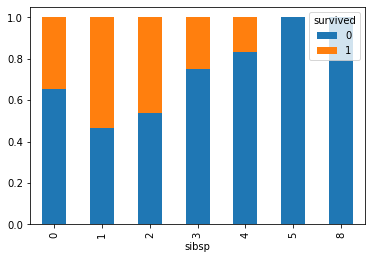

In [60]:
pd.crosstab(titanic['sibsp'], titanic['survived'], normalize = 0).plot(kind = 'bar', stacked = True)

yg sendirian mempunyai kecenderungan untuk tidak selamat

jika membawa satu, agak cenderung masih selamat

diatas 2, probabilitas untuk tidak selamat semakin tinggi

## Encode

In [61]:
df = titanic.copy()

In [62]:
# karena datanya berbentuk text, kita encoding dulu
encode = 'sex embarked'.split()
encoder0 = LabelEncoder()
for i in encode:
    df[i] = encoder0.fit_transform(df[i])

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


## Data Split

In [63]:
state = 2021

In [64]:
X = df.drop('survived', axis =1)
y = df['survived']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = state)

In [66]:
logit = LogisticRegression(solver="liblinear", random_state=state)
rfc = RandomForestClassifier(random_state=state)
dtc = DecisionTreeClassifier(random_state = state)
knn = KNeighborsClassifier(n_neighbors=3)
nb = GaussianNB()
svm = SVC(random_state = state)

kolom = ['model', 'score'] 
baris = [] # [[logit, score], [rfc, score], [dtc, score], [knn, score], [nb, score], [svm, score]]
list_model = [logit, rfc, dtc, knn, nb, svm]

for i in list_model:
    i.fit(X_train, y_train) # logit.fit(...)
    y_pred = i.predict(X_test) # y_pred = logit.predict
    score = accuracy_score(y_test,y_pred) # score
    baris.append([i, score]) # rfc, score
    print(i) 
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print('-'*40)

df = pd.DataFrame(baris, columns=kolom)
print(df)

LogisticRegression(random_state=2021, solver='liblinear')
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179

Confusion Matrix
[[96 14]
 [24 45]]
----------------------------------------
RandomForestClassifier(random_state=2021)
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix
[[94 16]
 [18 51]]
----------------------------------------
DecisionTreeClassifier(random_state=2021)
Classi

In [67]:
df.sort_values('score')

,model,score
5,SVC(random_state=2021),0.698324
2,DecisionTreeClassifier(random_state=2021),0.737430
3,KNeighborsClassifier(n_neighbors=3),0.765363
4,GaussianNB(),0.776536
0,"LogisticRegression(random_state=2021, solver='...",0.787709
1,"(DecisionTreeClassifier(max_features='auto', r...",0.810056


In [69]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Classification Report")
print(classification_report(y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix
[[94 16]
 [18 51]]


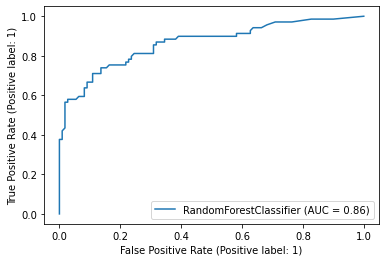

In [72]:
plot_roc_curve(rfc, X_test, y_test)

score AUC di atas 85 dan dengan akurasi 81%, relatif bagus. kita pakai model ini.

In [76]:
rfc.fit(X,y)

RandomForestClassifier(random_state=2021)

coba test ke data test

In [84]:
# Save model

filename = 'rfc.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [85]:
# Load model

filename = 'rfc.sav'
loaded_model = pickle.load((open(filename, 'rb')))
loaded_model

RandomForestClassifier(random_state=2021)

In [77]:
test = test_data.copy()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


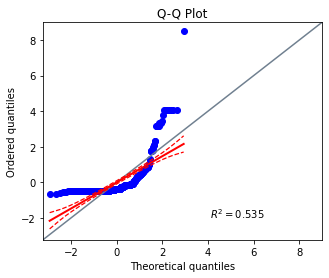

In [79]:
pg.qqplot(test.Fare, dist='norm')
plt.show()

In [80]:
#drop kolom yang tidak diperlukan, inpute age dan fare
test.columns = test.columns.str.lower()
test.drop('name cabin passengerid ticket'.split(), axis=1, inplace=True)
test['age'] = test.age.replace(np.nan, test.age.mean())
test['fare'] = test.fare.replace(np.nan, test.fare.median())

In [81]:
encode = 'sex embarked'.split()
encoder0 = LabelEncoder()
for i in encode:
    test[i] = encoder0.fit_transform(test[i])

test

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [87]:
test_pred = loaded_model.predict(test)

In [92]:
test_data['survived_predict'] = test_pred
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived_predict
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


DONE!